# 1 Data Wrangling <a id="data_wrangling"></a>

## Table of Contents  <a id="contents"></a>

<a id="contents"></a>
## 1.1 Table of Contents

- [1 Data Wrangling](#data_wrangling)
  - [1.1 Contents](#contents)
  - [1.2 Introduction](#introduction)
  - [1.3 Imports](#imports)
  - [1.4 Load the Data](#dataload)
  - [1.5 Concatenate Individual Years Datasets](#join_individual_years)
  - [1.6 Dataset Cleaning](#dataset_cleaning)
      - [1.6.1 4-Yr Graduation Rates](#4yr_grad_rate)
      - [1.6.2 SAT-ACT Scores](#sat_act_scores)
      - [1.6.3 District Funding Totals](#district_funding_totals)
      - [1.6.4 District Property Values](#district_property_values)
      - [1.6.5 AP-IB Scores & Participation](#ap_ib_scores_and_participation)
      - [1.6.6 Teacher Count & Avg Salary](#teacher_count_avg_salary)
      - [1.6.7 Average Daily Attendance (ADA)](#ada)
      - [1.6.8 Teacher Expertise](#teacher_expertise)
      - [1.6.9 Kids in Poverty](#kids_in_poverty)
      - [1.6.10 Median Incomes](#median_incomes)
  - [1.7 Ensure Consistency of district_id Column Values](#ensure_consistency)
  - [1.8 Join All Datasets](#join_all_datasets)
  - [1.9 Save Data](#save_data)


## 1.2 Introduction<a id="introduction"></a>

### Problem: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

Educational inequities persist across various school districts in Texas, potentially impacting student academic performance and long-term success. Despite the state's efforts to allocate funding based on Average Daily Attendance (ADA), disparities in funding raise concerns about the adequacy of resources available to each student. The core issue is whether the differences in funding correlate with academic outcomes and whether this could be a contributing factor to the educational inequities lurking beneath the surface of Texas' complex system. 

### Project: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

This data science project aims to examine the relationship between various educational variables -- school district funding in particular -- and student academic performance in Texas as measured by standardized test scores. By leveraging detailed financial, attendance, and academic data from the Texas Education Agency (TEA), the project seeks to identify patterns and correlations that could inform policy decisions and interventions aimed at reducing educational disparities. The hypothesis under investigation posits that higher levels of funding, particularly when accounting for attendance discrepancies, are associated with enhanced student performance.

### Clients: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The findings of this study will be of interest to a broad range of stakeholders, including educational policymakers, college admissions offices, school district administrators, teachers, parents, and students. It will particularly benefit decision-makers within the TEA and local educational authorities who are responsible for allocating resources and designing strategies to improve educational equity and outcomes across Texas.

### Data: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The datasets for this project are drawn from a few sources such as the U.S. Census Bureau and WalletHub, but they're primarily sourced from the TEA. The TEA provides comprehensive records on school district funding, student attendance rates, and various academic performance indicators. The data will be gathered and analyzed on a per-school district basis. The analysis will incorporate several features, including but not limited to, funding per student, attendance rates, socioeconomic levels, teacher expertise, and student-to-teacher ratios. Each feature will be carefully selected and processed to ensure the integrity and validity of the analysis. The primary goal is to develop a predictive model that accurately reflects the complex dynamics between educational variables and student success while highlighting any significant disparities that warrant attention.


**Texas Education Agency (TEA):** 
* 4-Yr HS Graduation Rates: https://tea.texas.gov/reports-and-data/school-performance/accountability-research/completion-graduation-and-dropout/four-year-graduation-and-dropout-data-class-of-2022 
* SAT-ACT Data: https://tea.texas.gov/reports-and-data/school-performance/accountability-research/satact/sat-and-act-data-class-of-2022 
* District Funding Totals: https://tea.texas.gov/finance-and-grants/state-funding/state-funding-reports-and-data/peims-financial-data-downloads 
* District Property Values: https://tea.texas.gov/finance-and-grants/state-funding/state-funding-reports-and-data/peims-financial-standard-reports 
* AP-IB Scores & Participation: https://tea.texas.gov/reports-and-data/school-performance/accountability-research/apib/advanced-placement-and-international-baccalaureate-data-2021-22 
* Teacher Count and Avg Salary: https://rptsvr1.tea.texas.gov/adhocrpt/adpeb.html 
* Average Daily Attendance (ADA): https://rptsvr1.tea.texas.gov/adhocrpt/adpeb.html 


**U.S. Census Bureau:**
* Kids in Poverty by District: https://www.census.gov/data/datasets/2022/demo/saipe/2022-school-districts.html 


**WalletHub:**
* Median Incomes per District: https://wallethub.com/edu/e/most-least-equitable-school-districts-in-texas/77134 


## 1.3 Imports <a id="imports"></a>

In [83]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

## 1.4 Load the Data <a id='dataload'></a>

To begin, we import all Excel files using the read_excel function from the pandas package. We then conduct a preliminary scan of the data. Each dataset varies considerably in their number of columns and rows. We'll analyze the last five years of available data, which represents 2018-2022 school years. 

In [84]:
# 4-Yr HS Graduation Rates -- 2022
hs_graduation_filepath = 'HS Graduation Rates -- TEA Data 4yr-2022.xlsx'
hs_graduation_data_sheet = 'Data'  
hs_graduation_data_2022_df = pd.read_excel(hs_graduation_filepath, sheet_name=hs_graduation_data_sheet)
hs_graduation_data_2022_df.head(3)

,CALC_FOR_STATE_ACCT,DISTRICT,DISTNAME,COUNTY,CNTYNAME,REGION,REGNNAME,DIST_ALLD,DIST_ALLN_CMP2,DIST_ALLN_GRAD,...,DIST_TTLN_CONT,DIST_TTLN_TXCHSE,DIST_TTLN_DROP,DIST_TTLR_CMP2,DIST_TTLR_GRAD,DIST_TTLR_CONT,DIST_TTLR_TXCHSE,DIST_TTLR_DROP,DIST_TTLR_RAED,DIST_EXCL
0,No,22902,Marathon ISD,22,Brewster County,18,Midland,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1,Yes,22902,Marathon ISD,22,Brewster County,18,Midland,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
2,No,46802,Trinity Charter School,46,Comal County,20,San Antonio,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,48


In [85]:
# 4-Yr HS Graduation Rates -- 2021
hs_graduation_filepath = 'HS Graduation Rates -- TEA Data 4yr-2021.xlsx'
hs_graduation_data_sheet = 'Data'  
hs_graduation_data_2021_df = pd.read_excel(hs_graduation_filepath, sheet_name=hs_graduation_data_sheet)

In [86]:
# 4-Yr HS Graduation Rates -- 2020
hs_graduation_filepath = 'HS Graduation Rates -- TEA Data 4yr-2020.xlsx'
hs_graduation_data_sheet = 'Data'  
hs_graduation_data_2020_df = pd.read_excel(hs_graduation_filepath, sheet_name=hs_graduation_data_sheet)

In [87]:
# 4-Yr HS Graduation Rates -- 2019
hs_graduation_filepath = 'HS Graduation Rates -- TEA Data 4yr-2019.xlsx'
hs_graduation_data_sheet = 'Data'  
hs_graduation_data_2019_df = pd.read_excel(hs_graduation_filepath, sheet_name=hs_graduation_data_sheet)

In [88]:
# 4-Yr HS Graduation Rates -- 2018
hs_graduation_filepath = 'HS Graduation Rates -- TEA Data 4yr-2018.xlsx'
hs_graduation_data_sheet = 'Data'  
hs_graduation_data_2018_df = pd.read_excel(hs_graduation_filepath, sheet_name=hs_graduation_data_sheet)

In [89]:
# SAT-ACT Scores -- 2022
sat_act_filepath = 'SAT-ACT Scores by District (2022) -- TEA Data.xlsx' 
sat_act_data_sheet = 'Data' 
sat_act_data_2022_df = pd.read_excel(sat_act_filepath, sheet_name=sat_act_data_sheet)
sat_act_data_2022_df.head(3)

,Group,District,DistName,County,CntyName,Region,RegnName,Grads_Mskd,Exnees_Mskd,Part_Rate,Crit_Mskd,Above_Crit_Rate,TSI_Both_Mskd,Above_TSI_Both_Rate
0,All Students,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<50,<50,63.0,<25,10.3,<25,27.6
1,African American,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,100.0,<25,NaN,<25,100.0
2,American Indian,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,NaN,<25,NaN,<25,NaN


In [90]:
# SAT-ACT Scores -- 2021
sat_act_filepath = 'SAT-ACT Scores by District (2021) -- TEA Data.xlsx' 
sat_act_data_sheet = 'Data' 
sat_act_data_2021_df = pd.read_excel(sat_act_filepath, sheet_name=sat_act_data_sheet)

In [91]:
# SAT-ACT Scores -- 2020
sat_act_filepath = 'SAT-ACT Scores by District (2020) -- TEA Data.xlsx' 
sat_act_data_sheet = 'Data' 
sat_act_data_2020_df = pd.read_excel(sat_act_filepath, sheet_name=sat_act_data_sheet)

In [92]:
# SAT-ACT Scores -- 2019
sat_act_filepath = 'SAT-ACT Scores by District (2019) -- TEA Data.xlsx' 
sat_act_data_sheet = 'Data' 
sat_act_data_2019_df = pd.read_excel(sat_act_filepath, sheet_name=sat_act_data_sheet)

In [93]:
# SAT-ACT Scores -- 2018
sat_act_filepath = 'SAT-ACT Scores by District (2018) -- TEA Data.xlsx' 
sat_act_data_sheet = 'Data' 
sat_act_data_2018_df = pd.read_excel(sat_act_filepath, sheet_name=sat_act_data_sheet)

In [94]:
# District Funding Totals
peims_funding_filepath = 'PEIMS District Funding Totals 2007-2022.xlsx'
peims_funding_data_sheet = 'Data'  
peims_funding_data_df = pd.read_excel(peims_funding_filepath, sheet_name=peims_funding_data_sheet)
peims_funding_data_df.head(3)

,District ID,District Name,YEAR,GEN FUNDS-LOCAL TAX REVENUE FROM M&O,ALL FUNDS-LOCAL TAX REVENUE FROM M&O,GEN FUNDS-STATE REVENUE,ALL FUNDS-STATE REVENUE,GEN FUNDS-FEDERAL REVENUE,ALL FUNDS-FEDERAL REVENUE,GEN FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE,...,ALL FUNDS-TOTAL OTHER USES,GEN FUNDS-INTERGOVERN CHARGES EXPEND,ALL FUNDS-INTERGOVERN CHARGES EXPEND,GEN FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,ALL FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,GEN FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,ALL FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,GEN FUNDS-TOTAL DISBURSEMENTS,ALL FUNDS-TOTAL DISBURSEMENTS,FALL SURVEY ENROLLMENT
0,1902,CAYUGA ISD,2007,4122552,4122552,1114179,1176283,0,250168,215239,...,5829,70703,70703,421865,421865,145130,156886,4907206,5348377,569
1,1902,CAYUGA ISD,2008,3641351,3641351,1845232,2350131,0,1852221,183293,...,15000,75304,210304,0,0,647852,632398,5391975,8274772,580
2,1902,CAYUGA ISD,2009,3319164,3319164,1950169,2473373,0,1714988,123568,...,0,166251,166251,0,0,722766,803313,6006273,8819439,594


In [95]:
# District Property Values -- 2022
property_values_filepath = 'PEIMS Tax Rates, Property Values, Property Values Per Pupil (2022) -- TEA Data.xlsx'
property_values_data_sheet = 'Data'  
property_values_data_2022_df = pd.read_excel(property_values_filepath, sheet_name=property_values_data_sheet)
property_values_data_2022_df.head(3)

,District ID,District Name,M&O Tax Rate,I&S Tax Rate,Total Tax Rate,Total Property Value,Total Property Value per pupil,Local Funding per Pupil,Business Property Value,Residential Property Value,Land Property Value,Oil and Gas Property Value,Other Property Value
0,109901,Abbott ISD,0.9321,0.2824,1.2145,115843601,410792.911348,4989.079908,46146930,31334380,14204919,0,564800
1,95901,Abernathy ISD,1.0517,0.3300,1.3817,465947826,568229.056098,7851.220868,311422590,104120735,23994789,55075540,2879446
2,221901,Abilene ISD,0.9249,0.3535,1.2784,5394710556,353195.662957,4515.253355,2359455936,3840796038,57215187,12503395,64347904


In [96]:
# District Property Values -- 2021
property_values_filepath = 'PEIMS Tax Rates, Property Values, Property Values Per Pupil (2021) -- TEA Data.xlsx'
property_values_data_sheet = 'Data'  
property_values_data_2021_df = pd.read_excel(property_values_filepath, sheet_name=property_values_data_sheet)

In [97]:
# District Property Values -- 2020
property_values_filepath = 'PEIMS Tax Rates, Property Values, Property Values Per Pupil (2020) -- TEA Data.xlsx'
property_values_data_sheet = 'Data'  
property_values_data_2020_df = pd.read_excel(property_values_filepath, sheet_name=property_values_data_sheet)

In [98]:
# District Property Values -- 2019
property_values_filepath = 'PEIMS Tax Rates, Property Values, Property Values Per Pupil (2019) -- TEA Data.xlsx'
property_values_data_sheet = 'Data'  
property_values_data_2019_df = pd.read_excel(property_values_filepath, sheet_name=property_values_data_sheet)

In [99]:
# District Property Values -- 2018
property_values_filepath = 'PEIMS Tax Rates, Property Values, Property Values Per Pupil (2018) -- TEA Data.xlsx'
property_values_data_sheet = 'Data'  
property_values_data_2018_df = pd.read_excel(property_values_filepath, sheet_name=property_values_data_sheet)

In [100]:
# AP-IB Scores & Participation -- 2022
ap_ib_scores_filepath = 'AP-IB Scores & Participation Data 2021-22 | Texas Education Agency.xlsx'
ap_ib_scores_data_sheet = 'Data'  
ap_ib_scores_data_2022_df = pd.read_excel(ap_ib_scores_filepath, sheet_name=ap_ib_scores_data_sheet)
ap_ib_scores_data_2022_df.head(3)

,Group,District ID,District Name,County,CntyName,Region,RegnName,Students_Mskd,Exnees_Mskd,Part_Rate,Exnees_Crit_Mskd,Exnees_Above_Crit_Rate,Exams_Mskd,Exams_Crit_Mskd,Exams_Above_Crit_Rate
0,All Students,14909,Temple ISD,14,Bell County,12,Waco,"1,100",200,18.2,101,50.5,452,193,42.7
1,African American,14909,Temple ISD,14,Bell County,12,Waco,<300,<50,9.2,<25,25.9,49,12,24.5
2,American Indian,14909,Temple ISD,14,Bell County,12,Waco,<25,<25,NaN,<25,NaN,<25,<25,NaN


In [101]:
# AP-IB Scores & Participation -- 2021
ap_ib_scores_filepath = 'AP-IB Scores & Participation Data 2020-21 | Texas Education Agency.xlsx'
ap_ib_scores_data_sheet = 'Data'  
ap_ib_scores_data_2021_df = pd.read_excel(ap_ib_scores_filepath, sheet_name=ap_ib_scores_data_sheet)

In [102]:
# AP-IB Scores & Participation -- 2020
ap_ib_scores_filepath = 'AP-IB Scores & Participation Data 2019-20 | Texas Education Agency.xlsx'
ap_ib_scores_data_sheet = 'Data'  
ap_ib_scores_data_2020_df = pd.read_excel(ap_ib_scores_filepath, sheet_name=ap_ib_scores_data_sheet)

In [103]:
# AP-IB Scores & Participation -- 2019
ap_ib_scores_filepath = 'AP-IB Scores & Participation Data 2018-19 | Texas Education Agency.xlsx'
ap_ib_scores_data_sheet = 'Data'  
ap_ib_scores_data_2019_df = pd.read_excel(ap_ib_scores_filepath, sheet_name=ap_ib_scores_data_sheet)

In [104]:
# AP-IB Scores & Participation -- 2018
ap_ib_scores_filepath = 'AP-IB Scores & Participation Data 2017-18 | Texas Education Agency.xlsx'
ap_ib_scores_data_sheet = 'Data'  
ap_ib_scores_data_2018_df = pd.read_excel(ap_ib_scores_filepath, sheet_name=ap_ib_scores_data_sheet)

In [105]:
# Teacher Count and Avg Salary -- 2022
peims_teacher_filepath = 'PEIMS Teacher Count & Avg Salary (2022)-- TEA Data.xlsx'
peims_teacher_data_sheet = 'Data'  
peims_teacher_data_2022_df = pd.read_excel(peims_teacher_filepath, sheet_name=peims_teacher_data_sheet)
peims_teacher_data_2022_df.head(3)

,Region,County,District ID,District Name,Charter Status,Staff_Category,Staff,FTE Count,Total Base Pay,Average Base Pay
0,10,DALLAS COUNTY,57816,A W BROWN LEADERSHIP ACADEMY,OPEN ENROLLMENT CHARTER,TEACHING STAFF,PRE-KINDERGARTEN,12.48,652611.0,52282.0
1,10,DALLAS COUNTY,57816,A W BROWN LEADERSHIP ACADEMY,OPEN ENROLLMENT CHARTER,TEACHING STAFF,KINDERGARTEN,10.64,536025.0,50372.0
2,10,DALLAS COUNTY,57816,A W BROWN LEADERSHIP ACADEMY,OPEN ENROLLMENT CHARTER,TEACHING STAFF,KINDERGARTEN/ELEMENTARY (K-6),2.96,197545.0,66718.0


In [106]:
# Teacher Count and Avg Salary - 2021
peims_teacher_filepath = 'PEIMS Teacher Count & Avg Salary (2021)-- TEA Data.xlsx'
peims_teacher_data_sheet = 'Data'  
peims_teacher_data_2021_df = pd.read_excel(peims_teacher_filepath, sheet_name=peims_teacher_data_sheet)

In [107]:
# Teacher Count and Avg Salary - 2020
peims_teacher_filepath = 'PEIMS Teacher Count & Avg Salary (2020)-- TEA Data.xlsx'
peims_teacher_data_sheet = 'Data'  
peims_teacher_data_2020_df = pd.read_excel(peims_teacher_filepath, sheet_name=peims_teacher_data_sheet)

In [108]:
# Teacher Count and Avg Salary - 2019
peims_teacher_filepath = 'PEIMS Teacher Count & Avg Salary (2019)-- TEA Data.xlsx'
peims_teacher_data_sheet = 'Data'  
peims_teacher_data_2019_df = pd.read_excel(peims_teacher_filepath, sheet_name=peims_teacher_data_sheet)

In [109]:
# Teacher Count and Avg Salary - 2018
peims_teacher_filepath = 'PEIMS Teacher Count & Avg Salary (2018)-- TEA Data.xlsx'
peims_teacher_data_sheet = 'Data'  
peims_teacher_data_2018_df = pd.read_excel(peims_teacher_filepath, sheet_name=peims_teacher_data_sheet)

In [110]:
# Average Daily Attendance (ADA)
ada_filepath = 'ADA (Avg Daily Attendance) 2005-2023 -- TEA data.xlsx'
ada_data_sheet = 'Data'  
ada_data_df = pd.read_excel(ada_filepath, sheet_name=ada_data_sheet)
ada_data_df.head(3)

,County,County Name,District ID,District Name,2004-2005 ADA,2005-2006 ADA,2006-2007 ADA,2007-2008 ADA,2008-2009 ADA,2009-2010 ADA,...,2013-2014 ADA,2014-2015 ADA,2015-2016 ADA,2016-2017 ADA,2017-2018 ADA,2018-2019 ADA,2019-2020 ADA,2020-2021 ADA,2021-2022 ADA,2022-2023 ADA
0,178,NUECES COUNTY,178806,21ST CENTURY ACADEMY OF SCIENCE AN,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
1,57,DALLAS COUNTY,57816,A W BROWN LEADERSHIP ACADEMY,711.384,849.091,923.753,991.948,1047.546,1131.454,...,1657.226,1799.313,1818.267,1918.032,1731.535,1585.182,1324.525,1026.444,880.776,763.44
2,57,DALLAS COUNTY,57829,A+ ACADEMY,830.974,878.711,896.752,865.948,896.359,1038.276,...,933.890,910.002,904.325,995.942,1245.197,1300.150,1222.064,1285.841,1388.241,1400.47


In [146]:
# Teacher Expertise Data -- 2022
teacher_expertise_filepath_2022 = 'Teacher Expertise (2022) -- TEA Data.xlsx'
teacher_expertise_data_sheet = 'Data' 
teacher_expertise_data_2022_df = pd.read_excel(teacher_expertise_filepath_2022, sheet_name=teacher_expertise_data_sheet)
teacher_expertise_data_2022_df.head(3)

,DISTRICT,DISTNAME,DPST00FC,DPST00FP,DPST01FC,DPST01FP,DPST06FC,DPST06FP,DPST11FC,DPST11FP,...,DPSTEXPA,DPSTKIDR,DPSTMSFC,DPSTMSFP,DPSTNOFC,DPSTNOFP,DPSTPHFC,DPSTPHFP,DPSTTENA,DPSTURNR
0,1902,CAYUGA ISD,0,0,4.8,10.4,7.8,16.6,14.6,31.2,...,16.7,12.3,6.9,14.8,0,0,0,0,9.9,19.1
1,1903,ELKHART ISD,3,2.9,22,21,17,16.2,39.9,38,...,13.5,11,19.9,19,2,1.9,0,0,7.6,13.9
2,1904,FRANKSTON ISD,2.3,3.1,22,29.5,14,18.8,17.9,24,...,12.8,10.8,22.8,30.7,1,1.3,0,0,5.1,21.6


In [147]:
# Teacher Expertise Data -- 2021
teacher_expertise_filepath_2021 = 'Teacher Expertise (2021) -- TEA Data.xlsx'
teacher_expertise_data_sheet = 'Data' 
teacher_expertise_data_2021_df = pd.read_excel(teacher_expertise_filepath_2021, sheet_name=teacher_expertise_data_sheet)

In [148]:
# Teacher Expertise Data -- 2020
teacher_expertise_filepath_2020 = 'Teacher Expertise (2020) -- TEA Data.xlsx'
teacher_expertise_data_sheet = 'Data' 
teacher_expertise_data_2020_df = pd.read_excel(teacher_expertise_filepath_2020, sheet_name=teacher_expertise_data_sheet)

In [149]:
# Teacher Expertise Data -- 2019
teacher_expertise_filepath_2019 = 'Teacher Expertise (2019) -- TEA Data.xlsx'
teacher_expertise_data_sheet = 'Data' 
teacher_expertise_data_2019_df = pd.read_excel(teacher_expertise_filepath_2019, sheet_name=teacher_expertise_data_sheet)

In [150]:
# Teacher Expertise Data -- 2018
teacher_expertise_filepath_2018 = 'Teacher Expertise (2018) -- TEA Data.xlsx'
teacher_expertise_data_sheet = 'Data'  
teacher_expertise_data_2018_df = pd.read_excel(teacher_expertise_filepath_2018, sheet_name=teacher_expertise_data_sheet)

In [151]:
# Kids in Poverty by District -- 2022
kids_poverty_filepath = 'Kids in Poverty Per School District 2022 – U.S. Census Bureau.xlsx'
kids_poverty_data_sheet = 'Data'  
kids_poverty_data_2022_df = pd.read_excel(kids_poverty_filepath, sheet_name=kids_poverty_data_sheet)
kids_poverty_data_2022_df.head(3)

,State Postal Code,State FIPS Code,District ID,District Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder
0,TX,48,109901,Abbott ISD,1082,185,18
1,TX,48,95901,Abernathy ISD,3476,774,147
2,TX,48,221901,Abilene ISD,105506,17290,3505


In [152]:
# Kids in Poverty by District -- 2021
kids_poverty_filepath = 'Kids in Poverty Per School District 2021 – U.S. Census Bureau.xlsx'
kids_poverty_data_sheet = 'Data'  
kids_poverty_data_2021_df = pd.read_excel(kids_poverty_filepath, sheet_name=kids_poverty_data_sheet)

In [153]:
# Kids in Poverty by District -- 2020
kids_poverty_filepath = 'Kids in Poverty Per School District 2020 – U.S. Census Bureau.xlsx'
kids_poverty_data_sheet = 'Data'  
kids_poverty_data_2020_df = pd.read_excel(kids_poverty_filepath, sheet_name=kids_poverty_data_sheet)

In [154]:
# Kids in Poverty by District -- 2019
kids_poverty_filepath = 'Kids in Poverty Per School District 2019 – U.S. Census Bureau.xlsx'
kids_poverty_data_sheet = 'Data'  
kids_poverty_data_2019_df = pd.read_excel(kids_poverty_filepath, sheet_name=kids_poverty_data_sheet)

In [155]:
# Kids in Poverty by District -- 2018
kids_poverty_filepath = 'Kids in Poverty Per School District 2018 – U.S. Census Bureau.xlsx'
kids_poverty_data_sheet = 'Data'  
kids_poverty_data_2018_df = pd.read_excel(kids_poverty_filepath, sheet_name=kids_poverty_data_sheet)

In [156]:
# Median Incomes per District
income_filepath = 'Median Incomes & Total Expenses Per Pupil by District -- WalletHub.xlsx'
income_data_sheet = 'Data'  
income_data_df = pd.read_excel(income_filepath, sheet_name=income_data_sheet)
income_data_df.head(3)

,Rank,District ID,District Name,Score,Expenditures for Public Elementary and Secondary Schools per Pupil,Income by School District,Unnamed: 6,Unnamed: 7
0,1,207901,Schleicher ISD,0.06,13317,61094,NaN,NaN
1,2,143906,Ezzell ISD,0.07,12961,62833,NaN,NaN
2,3,91901,Bells ISD,0.08,10796,73388,NaN,NaN


## 1.5 Concatenate Individual Years Datasets <a id='join_individual_years'></a>

We'll now need to concatenate all the different years of individual datasets together. Before doing so though, we'll add a column "Year" where appropriate for future use. 

In [157]:
# Add Year columns to specific datasets 


hs_graduation_data_2022_df['Year'] = 2022
hs_graduation_data_2021_df['Year'] = 2021
hs_graduation_data_2020_df['Year'] = 2020
hs_graduation_data_2019_df['Year'] = 2019
hs_graduation_data_2018_df['Year'] = 2018

sat_act_data_2022_df['Year'] = 2022
sat_act_data_2021_df['Year'] = 2021
sat_act_data_2020_df['Year'] = 2020
sat_act_data_2019_df['Year'] = 2019
sat_act_data_2018_df['Year'] = 2018

property_values_data_2022_df['Year'] = 2022
property_values_data_2021_df['Year'] = 2021
property_values_data_2020_df['Year'] = 2020
property_values_data_2019_df['Year'] = 2019
property_values_data_2018_df['Year'] = 2018

ap_ib_scores_data_2022_df['Year'] = 2022
ap_ib_scores_data_2021_df['Year'] = 2021
ap_ib_scores_data_2020_df['Year'] = 2020
ap_ib_scores_data_2019_df['Year'] = 2019
ap_ib_scores_data_2018_df['Year'] = 2018

peims_teacher_data_2022_df['Year'] = 2022
peims_teacher_data_2021_df['Year'] = 2021
peims_teacher_data_2020_df['Year'] = 2020
peims_teacher_data_2019_df['Year'] = 2019
peims_teacher_data_2018_df['Year'] = 2018

teacher_expertise_data_2022_df['Year'] = 2022
teacher_expertise_data_2021_df['Year'] = 2021
teacher_expertise_data_2020_df['Year'] = 2020
teacher_expertise_data_2019_df['Year'] = 2019
teacher_expertise_data_2018_df['Year'] = 2018

kids_poverty_data_2022_df['Year'] = 2022
kids_poverty_data_2021_df['Year'] = 2021
kids_poverty_data_2020_df['Year'] = 2020
kids_poverty_data_2019_df['Year'] = 2019
kids_poverty_data_2018_df['Year'] = 2018

income_data_df['Year'] = 2023

In [158]:
# Concatenate individual datasets 

grad_df = pd.concat([
    hs_graduation_data_2022_df,
    hs_graduation_data_2021_df,
    hs_graduation_data_2020_df,
    hs_graduation_data_2019_df,
    hs_graduation_data_2018_df
])

sat_act_df = pd.concat([
    sat_act_data_2022_df,
    sat_act_data_2021_df,
    sat_act_data_2020_df,
    sat_act_data_2019_df,
    sat_act_data_2018_df
])

property_values_df = pd.concat([
    property_values_data_2022_df,
    property_values_data_2021_df,
    property_values_data_2020_df,
    property_values_data_2019_df,
    property_values_data_2018_df
])

ap_ib_scores_df = pd.concat([
    ap_ib_scores_data_2022_df,
    ap_ib_scores_data_2021_df,
    ap_ib_scores_data_2020_df,
    ap_ib_scores_data_2019_df,
    ap_ib_scores_data_2018_df
])

teacher_df = pd.concat([
    peims_teacher_data_2022_df,
    peims_teacher_data_2021_df,
    peims_teacher_data_2020_df,
    peims_teacher_data_2019_df,
    peims_teacher_data_2018_df
])

teacher_expertise_df = pd.concat([
    teacher_expertise_data_2022_df,
    teacher_expertise_data_2021_df,
    teacher_expertise_data_2020_df,
    teacher_expertise_data_2019_df,
    teacher_expertise_data_2018_df
])

poverty_df = pd.concat([
    kids_poverty_data_2022_df,
    kids_poverty_data_2021_df,
    kids_poverty_data_2020_df,
    kids_poverty_data_2019_df,
    kids_poverty_data_2018_df
])



In [159]:
teacher_expertise_df.head()

,DISTRICT,DISTNAME,DPST00FC,DPST00FP,DPST01FC,DPST01FP,DPST06FC,DPST06FP,DPST11FC,DPST11FP,...,DPSTPHFC,DPSTPHFP,DPSTTENA,DPSTURNR,Year,DPST20FC,DPST20FP,a,b,c
0,1902,CAYUGA ISD,0,0,4.8,10.4,7.8,16.6,14.6,31.2,...,0,0,9.9,19.1,2022,NaN,NaN,NaN,NaN,NaN
1,1903,ELKHART ISD,3,2.9,22,21,17,16.2,39.9,38,...,0,0,7.6,13.9,2022,NaN,NaN,NaN,NaN,NaN
2,1904,FRANKSTON ISD,2.3,3.1,22,29.5,14,18.8,17.9,24,...,0,0,5.1,21.6,2022,NaN,NaN,NaN,NaN,NaN
3,1906,NECHES ISD,0,0,2.9,9.7,8.7,28.7,9,29.8,...,0,0,7.8,18.3,2022,NaN,NaN,NaN,NaN,NaN
4,1907,PALESTINE ISD,21,8.1,67,25.7,46.6,17.9,72.4,27.8,...,0,0,7,17.9,2022,NaN,NaN,NaN,NaN,NaN


### 1.6.1 4-Yr HS Graduation Rates <a id='4yr_grad_rate'></a>

TEA calculates two sets of rates: one for state accountability purposes, and one for federal accountability/reporting purposes. This is reflected in the 'CALC_FOR_STATE_ACCT' column. 

Since our analysis focuses on the state of Texas, using the high school graduation rate calculated for state accountability purposes would be the most appropriate choice to ensure alignment with the state's educational context and policies. Thus, we'll keep the graduation rates where CALC_FOR_STATE_ACCT = 'Yes', and drop the rows where this is marked 'No'. 

We'll also want to keep the dropout rate ('DIST_ALLR_DROP'), as well as a few additional columns, such as county and region, in case they prove useful later. 

'COUNTY': County number. 

'CNTYNAME': County name. 

'REGION': Region number. 

'REGNNAME': Region name. 

'DIST_ALLR_GRAD': District all students graduation rate. 

'DIST_ALLR_CONT': District all students continuation rate. 

'DIST_ALLR_TXCHSE': District all students TxCHSE rate. 

'DIST_ALLR_DROP': District all students dropout rate. 

In [161]:
# 4-Yr HS Graduation Rates Clean-Up

    
# (1) Drop Columns: 
# Specify the columns to keep:
columns_to_keep = ['CALC_FOR_STATE_ACCT', 'DISTRICT', 'DISTNAME', 
                   'COUNTY', 'CNTYNAME', 'REGION', 'REGNNAME', 
                   'DIST_ALLR_GRAD', 'DIST_ALLR_CONT', 'DIST_ALLR_TXCHSE', 'DIST_ALLR_DROP', 'Year']
# Drop all other columns
grad_df = grad_df[columns_to_keep]
# Drop rows where CALC_FOR_STATE_ACCT is 'No'
grad_df = grad_df[grad_df['CALC_FOR_STATE_ACCT'] != 'No']



# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'DISTRICT': 'district_id',  
    'DISTNAME': 'district_name', 
    'CALC_FOR_STATE_ACCT': 'calc_for_state_acct',
    'COUNTY': 'county',
    'CNTYNAME': 'county_name',
    'REGION': 'region',
    'REGNNAME': 'region_name',
    'DIST_ALLR_GRAD': 'dist_allr_grad',
    'DIST_ALLR_CONT': 'dist_allr_cont',
    'DIST_ALLR_TXCHSE': 'dist_allr_txchse',
    'DIST_ALLR_DROP': 'dist_allr_drop'
}
# Rename the columns using the dictionary
grad_df = grad_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
grad_df['district_id'] = grad_df['district_id'].astype(int)  # Convert to integer

# Display the first few rows of the modified dataframe
print(grad_df.head())


  calc_for_state_acct  district_id           district_name  county  \
1                 Yes        22902            Marathon ISD      22   
3                 Yes        46802  Trinity Charter School      46   
5                 Yes        65902              Hedley ISD      65   
7                 Yes       115903           Dell City ISD     115   
9                 Yes       122902           Valentine ISD     122   

         county_name  region  region_name  dist_allr_grad  dist_allr_cont  \
1    Brewster County      18      Midland            -1.0            -1.0   
3       Comal County      20  San Antonio            -1.0            -1.0   
5      Donley County      16     Amarillo            -1.0            -1.0   
7    Hudspeth County      19      El Paso            -1.0            -1.0   
9  Jeff Davis County      18      Midland            -1.0            -1.0   

  dist_allr_txchse  dist_allr_drop  Year  
1               -1            -1.0  2022  
3               -1            

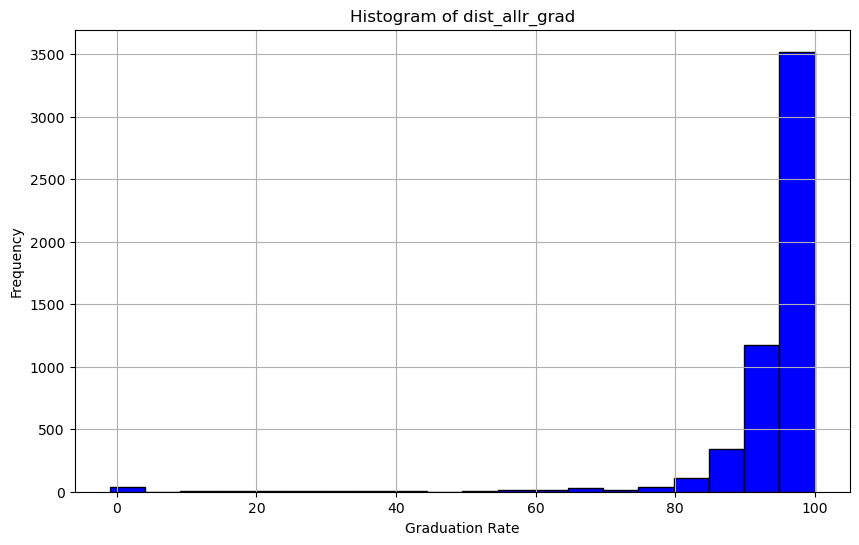

In [162]:
# (4) Outliers: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(grad_df['dist_allr_grad'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of dist_allr_grad')
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Looks like we have a few outlier graduation rates between 0 and 20. These could be data entry errors or data corruption, or the result of actual variation in the data (i.e., some districts genuinely have very low graduation rates), and thus, they contain valuable information. Though we'll want to take note of this during the modeling stage due to the sensitivity of some models to outliers, we'll want to keep these for now to understand the factors contributing to extremely low graduation rates. 

In [163]:
# (5) Check for missing values
grad_df.isna().sum()

calc_for_state_acct       0
district_id               0
district_name             0
county                    0
county_name               0
region                    0
region_name               0
dist_allr_grad            0
dist_allr_cont            0
dist_allr_txchse       2118
dist_allr_drop            0
Year                      0
dtype: int64

There are no missing values, which is likely the case with most of the features in our other datasets. We'll then check the datatypes and counts of each feature. 

In [164]:
grad_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5335 entries, 1 to 2117
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   calc_for_state_acct  5335 non-null   object 
 1   district_id          5335 non-null   int64  
 2   district_name        5335 non-null   object 
 3   county               5335 non-null   int64  
 4   county_name          5335 non-null   object 
 5   region               5335 non-null   int64  
 6   region_name          5335 non-null   object 
 7   dist_allr_grad       5335 non-null   float64
 8   dist_allr_cont       5335 non-null   float64
 9   dist_allr_txchse     3217 non-null   object 
 10  dist_allr_drop       5335 non-null   float64
 11  Year                 5335 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 541.8+ KB


### 1.6.2 SAT-ACT Scores <a id='sat_act_scores'></a>

We don't have data on exact SAT-ACT scores, but we do have two different rates that show a percentage of students meeting certain cutoffs. Here are the column definitions: 

Part_Rate: Percent of graduates taking the SAT and/or ACT. 

Above_Crit_Rate: Percent of graduating examinees scoring at or above 1180 (SAT total) or 24 (ACT composite). Both these scores are above the national averages. 

Above_TSI_Both_Rate: Percent of graduating examinees meeting the college-ready graduates TSI benchmarks for the SAT or the ACT on both reading/language arts and mathematics. 

We'll examine the difference between the two score rates (Above_Crit_Rate and Above_TSI_Both_Rate) to determine which is optimal for gauging student performance. 

We'll need to combine the participation rates w/ the test score rates to best reflect each district's educational outcomes. 

In [165]:
# SAT-ACT Scores Clean-Up


# (1) Drop Columns
# Drop rows where Group is not 'All Students'
sat_act_df = sat_act_df[sat_act_df['Group'] == 'All Students']
# Specify the columns to keep:
columns_to_keep = ['District', 'DistName',
                   'Part_Rate', 'Above_Crit_Rate', 'Above_TSI_Both_Rate', 'Year']
# Drop all other columns
sat_act_df = sat_act_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District': 'district_id',  
    'DistName': 'district_name', 
    'Part_Rate': 'part_rate',
    'Above_Crit_Rate': 'above_crit_rate',
    'Above_TSI_Both_Rate': 'above_tsi_both_rate'
}
# Rename the columns using the dictionary
sat_act_df = sat_act_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
sat_act_df['district_id'] = sat_act_df['district_id'].astype(int)  # Convert to integer



# Display the first few rows of the modified dataframe
print(sat_act_df.head())

     district_id  district_name  part_rate  above_crit_rate  \
0           1902     Cayuga ISD       63.0             10.3   
57          1903    Elkhart ISD       44.9             12.9   
114         1904  Frankston ISD       95.6             11.6   
171         1906     Neches ISD       54.2             30.8   
228         1907  Palestine ISD       36.5             29.4   

     above_tsi_both_rate  Year  
0                   27.6  2022  
57                  41.9  2022  
114                 32.6  2022  
171                 61.5  2022  
228                 56.5  2022  


Let's examine the two different score rates, and the outliers among both. 

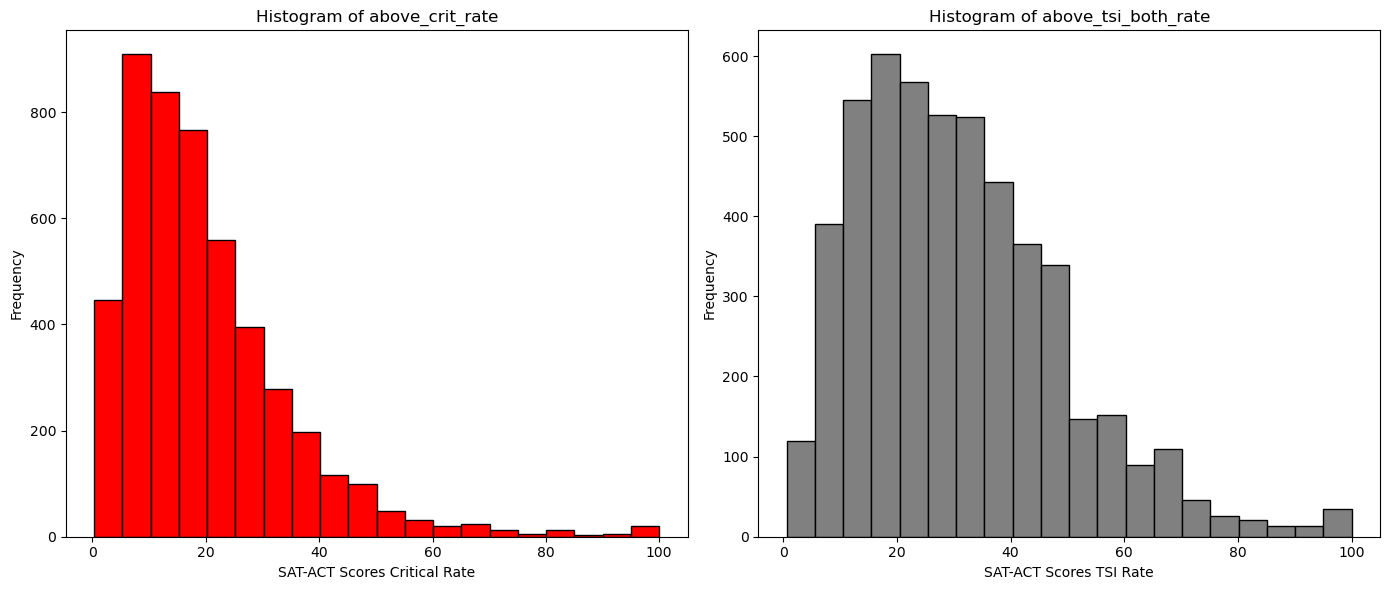

In [166]:
# (4) Outliers: Plotting the histogram

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the histogram for 'above_crit_rate' on the first subplot
axes[0].hist(sat_act_df['above_crit_rate'], bins=20, color='red', edgecolor='black')
axes[0].set_title('Histogram of above_crit_rate')
axes[0].set_xlabel('SAT-ACT Scores Critical Rate')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'above_tsi_both_rate' on the second subplot
axes[1].hist(sat_act_df['above_tsi_both_rate'], bins=20, color='grey', edgecolor='black')
axes[1].set_title('Histogram of above_tsi_both_rate')
axes[1].set_xlabel('SAT-ACT Scores TSI Rate')
axes[1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

The histogram for Above_Crit_Rate shows a bimodal distribution with a significant number of districts at the lower end of the scale and some outliers near 100. This could indicate a split in the performance of districts, with some performing significantly better than others. This variable might be more straightforward for comparison and could be suitable since we're interested in factors that lead to higher-than-average SAT-ACT performance.

The histogram for Above_TSI_Both_Rate is more normally distributed with a single peak, showing that performance on the TSI benchmarks is more evenly spread across districts. This target variable includes requirements for both reading/language arts and mathematics, which could provide a more complete view of college readiness. 

However, from comparing both distributions, the TSI benchmarks appear to be less stringent than the Above_Crit_Rate scores. This indicates they may not be as high as the national average scores used in the Above_Crit_Rate, so it may be less indicative of student success, which is ultimately what we're trying to discern. 

In [167]:
# (5) Check for missing values
sat_act_df.isna().sum()

district_id              0
district_name            0
part_rate               58
above_crit_rate        602
above_tsi_both_rate    318
Year                     0
dtype: int64

In [168]:
# Check for datatypes
sat_act_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5393 entries, 0 to 58698
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   district_id          5393 non-null   int64  
 1   district_name        5393 non-null   object 
 2   part_rate            5335 non-null   float64
 3   above_crit_rate      4791 non-null   float64
 4   above_tsi_both_rate  5075 non-null   float64
 5   Year                 5393 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 294.9+ KB


**Choice of score rate:** Though there are a bit more missing values, we're going to choose the Above_Crit_Rate since our focus is on high achievement in standardized testing, rather than a less clearly defined college readiness indicator. 

### 1.6.3 District Funding Totals <a id='district_funding_totals'></a>

We'll focus on state, local, and federal funding amounts, as this gives a clear and direct measure of the funds that are most likely to impact day-to-day school operations and educational programs, which are central to student success. These categories are also more standardized in financial reporting compared to other types of disbursements, which is key for comparing across districts.

In [169]:
# Subset on Years 2018-2022
years = [2022, 2021, 2020, 2019, 2018]
peims_funding_data_df = peims_funding_data_df[peims_funding_data_df['YEAR'].isin(years)]

In [170]:
peims_funding_data_df.head()

,District ID,District Name,YEAR,GEN FUNDS-LOCAL TAX REVENUE FROM M&O,ALL FUNDS-LOCAL TAX REVENUE FROM M&O,GEN FUNDS-STATE REVENUE,ALL FUNDS-STATE REVENUE,GEN FUNDS-FEDERAL REVENUE,ALL FUNDS-FEDERAL REVENUE,GEN FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE,...,ALL FUNDS-TOTAL OTHER USES,GEN FUNDS-INTERGOVERN CHARGES EXPEND,ALL FUNDS-INTERGOVERN CHARGES EXPEND,GEN FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,ALL FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,GEN FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,ALL FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,GEN FUNDS-TOTAL DISBURSEMENTS,ALL FUNDS-TOTAL DISBURSEMENTS,FALL SURVEY ENROLLMENT
11,1902,CAYUGA ISD,2018,2948406,2948406,2437211,3256405,58608,1613694,144477,...,54833,222620,222620,0,0,91590,142094,5641406,8744613,575
12,1902,CAYUGA ISD,2019,3312342,3312342,2600715,3466026,61107,1880457,200999,...,48633,220289,220289,0,0,426338,426338,6108358,9254146,564
13,1902,CAYUGA ISD,2020,3269657,3269657,3657164,4624285,39697,1539484,108704,...,79856,225316,225316,0,0,457640,491482,6649717,9791838,557
14,1902,CAYUGA ISD,2021,3081356,3081356,3738183,4964406,26642,1939467,112377,...,90616,234695,915408,0,0,302296,333186,6686027,10228548,535
15,1902,CAYUGA ISD,2022,3094212,3094212,4197261,4204460,91436,2647825,221819,...,0,267140,794807,0,0,312480,312480,6736571,10812870,574


In [171]:
# District Funding Totals Clean-Up

funding_df = peims_funding_data_df


# (1) Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name', 'YEAR',
                   # Enrollment Numbers: 
                   'FALL SURVEY ENROLLMENT',
                   # Local Funding Amount Columns: 
                   'GEN FUNDS-LOCAL TAX REVENUE FROM M&O', 'ALL FUNDS-LOCAL TAX REVENUE FROM M&O',
                   'GEN FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE', 'ALL FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE',
                   'GEN FUNDS-LOCAL PROPERTY TAXES FROM I&S', 'ALL FUNDS-LOCAL PROPERTY TAXES FROM I&S',
                   # State Funding Amount Columns: 
                   'GEN FUNDS-STATE REVENUE', 'ALL FUNDS-STATE REVENUE', 'GEN FUNDS-STATE DEBT FUNDS', 
                   'ALL FUNDS-STATE DEBT FUNDS', 'GEN FUNDS-ESTIMATED STATE TRS CONTRIBUTIONS', 
                   'ALL FUNDS-ESTIMATED STATE TRS CONTRIBUTIONS',
                   'GEN FUNDS-STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34',
                   'ALL FUNDS-STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34',
                   # Federal Funding Amount Columns:
                   'GEN FUNDS-FEDERAL REVENUE', 'ALL FUNDS-FEDERAL REVENUE']
# Drop all other columns
funding_df = funding_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    'YEAR': 'Year',
    'FALL SURVEY ENROLLMENT': 'fall_enrollment',
    'GEN FUNDS-LOCAL TAX REVENUE FROM M&O': 'gen_funds_local_tax_mo',
    'ALL FUNDS-LOCAL TAX REVENUE FROM M&O': 'all_funds_local_tax_mo',
    'GEN FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE': 'gen_funds_other_local_revenue',
    'ALL FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE': 'all_funds_other_local_revenue',
    'GEN FUNDS-LOCAL PROPERTY TAXES FROM I&S': 'gen_funds_local_tax_is',
    'ALL FUNDS-LOCAL PROPERTY TAXES FROM I&S': 'all_funds_local_tax_is',
    'GEN FUNDS-STATE REVENUE': 'gen_funds_state_revenue',
    'ALL FUNDS-STATE REVENUE': 'all_funds_state_revenue',
    'GEN FUNDS-STATE DEBT FUNDS': 'gen_funds_state_debt',
    'ALL FUNDS-STATE DEBT FUNDS': 'all_funds_state_debt',
    'GEN FUNDS-ESTIMATED STATE TRS CONTRIBUTIONS': 'gen_funds_state_trs_contrib',
    'ALL FUNDS-ESTIMATED STATE TRS CONTRIBUTIONS': 'all_funds_state_trs_contrib',
    'GEN FUNDS-STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34': 'gen_funds_state_comp_ed_expend',
    'ALL FUNDS-STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34': 'all_funds_state_comp_ed_expend',
    'GEN FUNDS-FEDERAL REVENUE': 'gen_funds_federal_revenue',
    'ALL FUNDS-FEDERAL REVENUE': 'all_funds_federal_revenue'
}
# Rename the columns using the dictionary
funding_df = funding_df.rename(columns=rename_dict)



# (3) Data Type Conversion
# Convert columns to appropriate data types
funding_df['district_id'] = funding_df['district_id'].astype(int)  # Convert to integer


# Display the first few rows of the modified dataframe
print(funding_df.head())

    district_id district_name  Year  fall_enrollment  gen_funds_local_tax_mo  \
11         1902    CAYUGA ISD  2018              575                 2948406   
12         1902    CAYUGA ISD  2019              564                 3312342   
13         1902    CAYUGA ISD  2020              557                 3269657   
14         1902    CAYUGA ISD  2021              535                 3081356   
15         1902    CAYUGA ISD  2022              574                 3094212   

    all_funds_local_tax_mo  gen_funds_other_local_revenue  \
11                 2948406                         144477   
12                 3312342                         200999   
13                 3269657                         108704   
14                 3081356                         112377   
15                 3094212                         221819   

    all_funds_other_local_revenue  gen_funds_local_tax_is  \
11                         529539                       0   
12                         633

We'll leave funding amounts alone for now, but revisit them later during feature engineering. We can check the distribution of students enrolled to see where the outliers lie. 

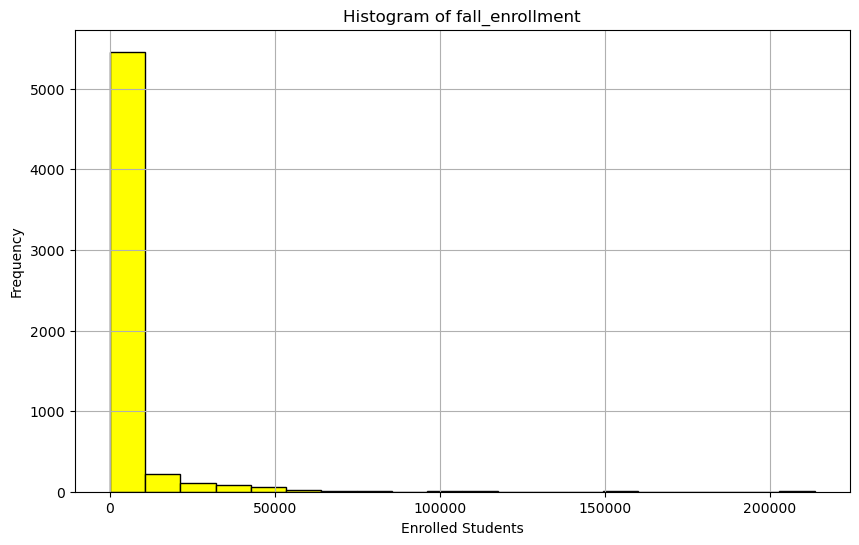

In [172]:
# (4) Outliers: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(funding_df['fall_enrollment'], bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of fall_enrollment')
plt.xlabel('Enrolled Students')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Looks like enrollment numbers are extremely right skewed, so we'll examine these outliers. 

In [173]:
selected_districts = funding_df.loc[funding_df['fall_enrollment'] > 100000, ['district_name', 'fall_enrollment']]
print(selected_districts)

              district_name  fall_enrollment
1439          NORTHSIDE ISD           106086
1440          NORTHSIDE ISD           105797
1441          NORTHSIDE ISD           107135
1442          NORTHSIDE ISD           102644
1443          NORTHSIDE ISD           101584
4585             DALLAS ISD           156726
4586             DALLAS ISD           155030
4587             DALLAS ISD           153784
4588             DALLAS ISD           145105
4589             DALLAS ISD           143430
8523  CYPRESS-FAIRBANKS ISD           116138
8524  CYPRESS-FAIRBANKS ISD           116245
8525  CYPRESS-FAIRBANKS ISD           117120
8526  CYPRESS-FAIRBANKS ISD           114560
8527  CYPRESS-FAIRBANKS ISD           116913
8594            HOUSTON ISD           213528
8595            HOUSTON ISD           209040
8596            HOUSTON ISD           209309
8597            HOUSTON ISD           196550
8598            HOUSTON ISD           193727


Though these districts have much higher enrollment than other districts, these are correct amounts and will be used for multiple engineered features in a later stage, so we don't need to remove them. 

In [174]:
# (5) Check for missing values
funding_df.isna().sum()

district_id                       0
district_name                     0
Year                              0
fall_enrollment                   0
gen_funds_local_tax_mo            0
all_funds_local_tax_mo            0
gen_funds_other_local_revenue     0
all_funds_other_local_revenue     0
gen_funds_local_tax_is            0
all_funds_local_tax_is            0
gen_funds_state_revenue           0
all_funds_state_revenue           0
gen_funds_state_debt              0
all_funds_state_debt              0
gen_funds_state_trs_contrib       0
all_funds_state_trs_contrib       0
gen_funds_state_comp_ed_expend    0
all_funds_state_comp_ed_expend    0
gen_funds_federal_revenue         0
all_funds_federal_revenue         0
dtype: int64

In [175]:
funding_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6008 entries, 11 to 19418
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   district_id                     6008 non-null   int64 
 1   district_name                   6008 non-null   object
 2   Year                            6008 non-null   int64 
 3   fall_enrollment                 6008 non-null   int64 
 4   gen_funds_local_tax_mo          6008 non-null   int64 
 5   all_funds_local_tax_mo          6008 non-null   int64 
 6   gen_funds_other_local_revenue   6008 non-null   int64 
 7   all_funds_other_local_revenue   6008 non-null   int64 
 8   gen_funds_local_tax_is          6008 non-null   int64 
 9   all_funds_local_tax_is          6008 non-null   int64 
 10  gen_funds_state_revenue         6008 non-null   int64 
 11  all_funds_state_revenue         6008 non-null   int64 
 12  gen_funds_state_debt            6008 non-null   int

### 1.6.4 District Property Values <a id='district_property_values'></a>

We'll focus on total property values per district, and keep the total tax rate just in case.  

In [176]:
# District Property Values Clean-Up

# (1) Drop Columns
# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name', 'Year',
                   'Total Tax Rate ', 'Total Property Value']
# Drop all other columns
property_values_df = property_values_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name',
    'Total Tax Rate ': 'total_tax_rate',
    'Total Property Value': 'total_property_value'
}
# Rename the columns using the dictionary
property_values_df = property_values_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
property_values_df['district_id'] = property_values_df['district_id'].astype(int)  # Convert to integer


# Display the first few rows of the modified dataframe
print(property_values_df.head())

   district_id  district_name  Year  total_tax_rate  total_property_value
0       109901     Abbott ISD  2022          1.2145             115843601
1        95901  Abernathy ISD  2022          1.3817             465947826
2       221901    Abilene ISD  2022          1.2784            5394710556
3        14901    Academy ISD  2022          1.3671             631794068
4       180903     Adrian ISD  2022          1.2318              65809401


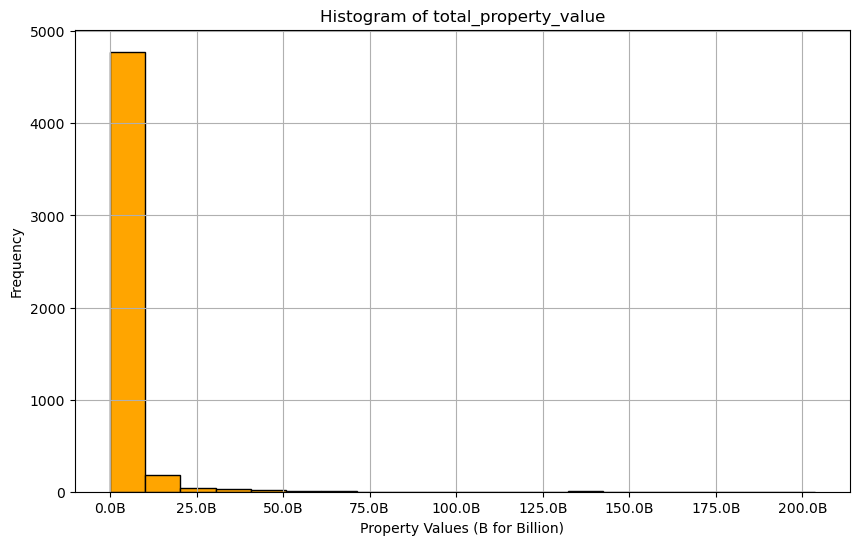

In [177]:
# (4) Outliers: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(property_values_df['total_property_value'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of total_property_value')
plt.xlabel('Property Values (B for Billion)')
plt.ylabel('Frequency')

# Function to format the x-axis labels as billions with a 'B' suffix
def billions_formatter(x, pos):
    return '%1.1fB' % (x * 1e-9)

# Set the formatter for the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(billions_formatter))

# Enable grid
plt.grid(True)

# Show the plot
plt.show()

Once again, we don't want to remove these outliers yet as they are legitimate property values, but it's helpful to see how extreme some property values become in certain districts. It will be interesting to see if this has any impact on student performance later. 

In [178]:
# (5) Check for missing values
property_values_df.isna().sum()

district_id             0
district_name           0
Year                    0
total_tax_rate          0
total_property_value    0
dtype: int64

### 1.6.5 AP-IB Scores & Participation <a id='ap_ib_scores_and_participation'></a>

We'll need both the percentages of students scoring well on AP/IB exams, and the corresponding participation rates. 

Exnees_Above_Crit_Rate: "Percent of examinees in Grades 11 and 12 scoring at or above 3 (AP) or 4 (IB) on at least one exam." 

Part_Rate: "Percent of students in Grades 11 and 12 taking at least one AP or IB exam." 

We'll want to keep the two variables as separate features in our analysis, since our hypothesis is not just that students scoring well on these exams are more likely to succeed, but also simply having the option to participate leads to better educational outcomes. 

In [179]:
# AP-IB Scores & Participation Clean-Up


# (1) Drop Columns
# Drop rows where Group is not 'All Students'
ap_ib_scores_df = ap_ib_scores_df[ap_ib_scores_df['Group'] == 'All Students']
# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name',
                   'Part_Rate', 'Exnees_Above_Crit_Rate']
# Drop all other columns
ap_ib_scores_df = ap_ib_scores_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    'Part_Rate': 'part_rate',
    'Exnees_Above_Crit_Rate': 'exnees_above_crit_rate'
}
# Rename the columns using the dictionary
ap_ib_scores_df = ap_ib_scores_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
ap_ib_scores_df['district_id'] = ap_ib_scores_df['district_id'].astype(int)  # Convert to integer



# Display the first few rows of the modified dataframe
print(ap_ib_scores_df.head())

     district_id    district_name  part_rate  exnees_above_crit_rate
0          14909       Temple ISD       18.2                    50.5
57         15907  San Antonio ISD       24.2                    29.8
114        15916       Judson ISD       10.3                    51.3
171        21902        Bryan ISD       19.5                    48.1
228        31916  South Texas ISD       73.1                    44.2


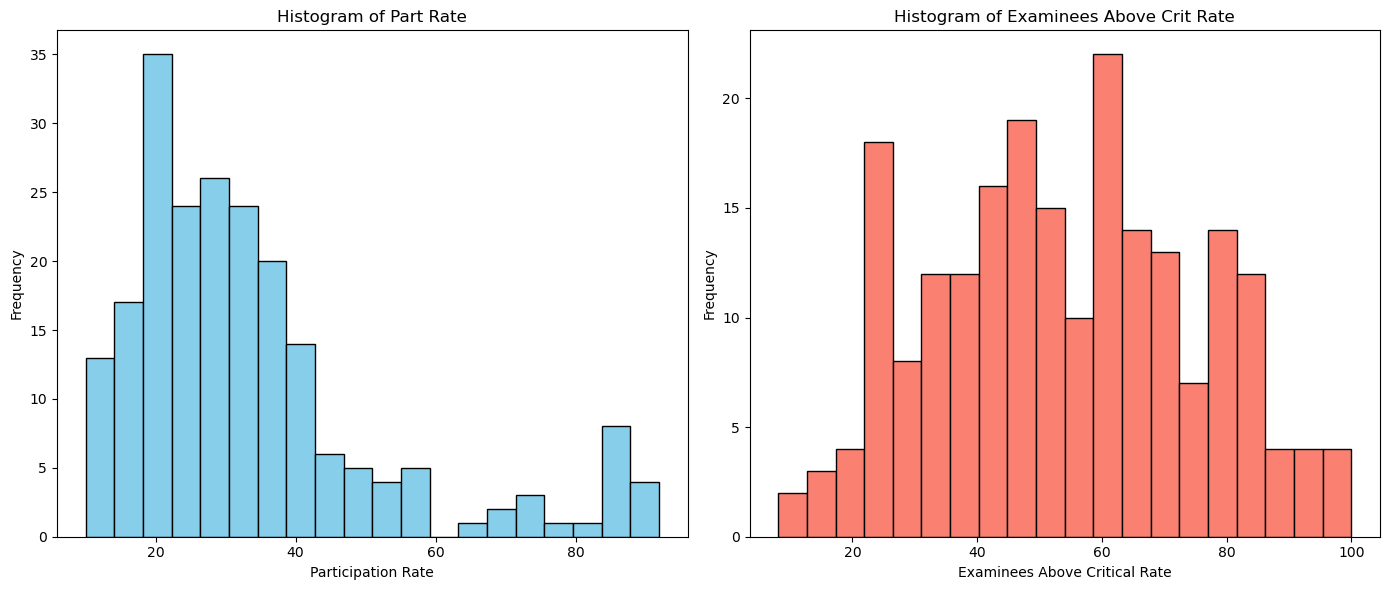

In [180]:
# (4) Outliers: Plotting the histograms
# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the histogram for 'part_rate' on the first subplot
axes[0].hist(ap_ib_scores_df['part_rate'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Part Rate')
axes[0].set_xlabel('Participation Rate')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'exnees_above_crit_rate' on the second subplot
axes[1].hist(ap_ib_scores_df['exnees_above_crit_rate'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histogram of Examinees Above Crit Rate')
axes[1].set_xlabel('Examinees Above Critical Rate')
axes[1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

The multimodal nature of both distributions implies that there is no single typical value for either participation rate or critical score rate across districts; instead, there are a spread of districts across different rate intervals. 
Both histograms suggest that higher rates of participation and examinees scoring above the critical threshold are less frequent.

In [181]:
# (5) Check for missing values
ap_ib_scores_df.isna().sum()

district_id               0
district_name             0
part_rate                 0
exnees_above_crit_rate    0
dtype: int64

### 1.6.6 Teacher Count and Avg Salary <a id='teacher_count_avg_salary'></a>

This has data on all staff types aside from teaching, such as admin, support, and others. We're focused on number of teachers and student-teacher ratios, so we'll exclude all but the teaching staff. 

In [182]:
# Teacher Count and Avg Salary Clean-Up


# Drop rows where Staff is not 'TOTAL TEACHING STAFF'
teacher_df = teacher_df[teacher_df['Staff'] == 'TOTAL TEACHING STAFF']

# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name', 'Year', 
                   'FTE Count', 'Total Base Pay', 'Average Base Pay']

# Drop all other columns
teacher_df = teacher_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    'FTE Count': 'fte_count',
    'Total Base Pay': 'total_base_pay', 
    'Average Base Pay': 'avg_base_pay'
}
# Rename the columns using the dictionary
teacher_df = teacher_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
teacher_df['district_id'] = teacher_df['district_id'].astype(int)  # Convert to integer



# Display the first few rows of the modified dataframe
print(teacher_df.head())

     district_id                 district_name  Year fte_count total_base_pay  \
15         57816  A W BROWN LEADERSHIP ACADEMY  2022     70.87      3678934.0   
60         57829                    A+ ACADEMY  2022     82.37      5146393.0   
109       101871        A+ UNLIMITED POTENTIAL  2022      8.88       568678.0   
137       109901                    ABBOTT ISD  2022     23.56      1275795.0   
169        95901                 ABERNATHY ISD  2022     71.96      3703323.0   

    avg_base_pay  
15       51912.0  
60       62482.0  
109      64047.0  
137      54155.0  
169      51462.0  


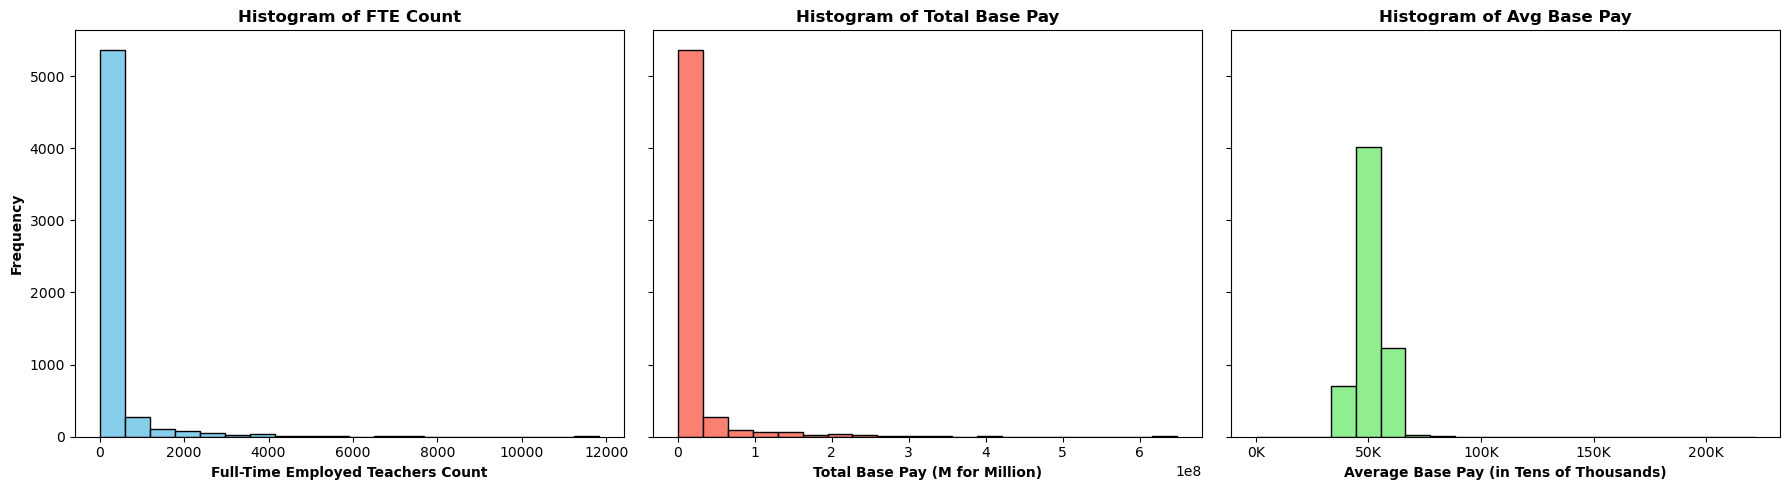

In [183]:
# (4) Outliers: Plotting the histograms

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Histogram for 'fte_count'
axes[0].hist(teacher_df['fte_count'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of FTE Count', fontweight='bold')
axes[0].set_xlabel('Full-Time Employed Teachers Count', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')

# Histogram for 'total_base_pay'
axes[1].hist(teacher_df['total_base_pay'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histogram of Total Base Pay', fontweight='bold')
axes[1].set_xlabel('Total Base Pay (M for Million)', fontweight='bold')
# Function to format the x-axis labels as millions with an 'M' suffix
def millions_formatter(x, pos):
    return '%1.1fM' % (x * 1e-6)
# Set the formatter for the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Histogram for 'avg_base_pay'
axes[2].hist(teacher_df['avg_base_pay'], bins=20, color='lightgreen', edgecolor='black')
axes[2].set_title('Histogram of Avg Base Pay', fontweight='bold')
axes[2].set_xlabel('Average Base Pay (in Tens of Thousands)', fontweight='bold')
# Function to format the x-axis labels as tens of thousands
def tens_of_thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)
# Set the formatter for the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(tens_of_thousands))

# Set the fontweight of the axis labels to bold
plt.tick_params(axis='both', which='major', labelsize=10)


# Display the histograms
plt.tight_layout()
plt.show()

The first two histograms are nearly identical, showing the vast majority of districts have a small number of full-time employed teachers and low total base pay. The Average Base Pay is more normally distributed with much less variance. We'll want to use total teachers count in feature engineering later to get a more meaningful stat per student count. 

In [184]:
# (5) Check for missing values
teacher_df.isna().sum()

district_id       0
district_name     0
Year              0
fte_count         0
total_base_pay    0
avg_base_pay      0
dtype: int64

### 1.6.7 Average Daily Attendance (ADA) <a id='ada'></a>

In [193]:
ada_data_df.columns

Index(['County', 'County Name', 'District ID', 'District Name',
       ' 2004-2005 ADA', ' 2005-2006 ADA', ' 2006-2007 ADA', '2007-2008 ADA',
       '2008-2009 ADA', ' 2009-2010 ADA', '2010-2011 ADA', ' 2011-2012 ADA',
       ' 2012-2013 ADA', ' 2013-2014 ADA', ' 2014-2015 ADA', ' 2015-2016 ADA',
       ' 2016-2017 ADA', ' 2017-2018 ADA', ' 2018-2019 ADA', ' 2019-2020 ADA',
       ' 2020-2021 ADA', '2021-2022 ADA', '2022-2023 ADA'],
      dtype='object')

In [194]:
# Average Daily Attendance (ADA) Clean-Up

ada_df = ada_data_df

# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name', '2021-2022 ADA', ' 2020-2021 ADA', 
                   ' 2019-2020 ADA', ' 2018-2019 ADA', ' 2017-2018 ADA']

# Drop all other columns
ada_df = ada_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    '2021-2022 ADA': '2021-2022_ada',
    ' 2020-2021 ADA': '2020-2021_ada', 
    ' 2019-2020 ADA': '2019-2020_ada', 
    ' 2018-2019 ADA': '2018-2019_ada', 
    ' 2017-2018 ADA': '2017-2018_ada'
}
# Rename the columns using the dictionary
ada_df = ada_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
ada_df['district_id'] = ada_df['district_id'].astype(int)  # Convert to integer



# Display the first few rows of the modified dataframe
print(ada_df.head())

   district_id                       district_name  2021-2022_ada  \
0       178806  21ST CENTURY ACADEMY OF SCIENCE AN          0.000   
1        57816        A W BROWN LEADERSHIP ACADEMY        880.776   
2        57829                          A+ ACADEMY       1388.241   
3       101871              A+ UNLIMITED POTENTIAL        132.817   
4       109901                          ABBOTT ISD        263.757   

   2020-2021_ada  2019-2020_ada  2018-2019_ada  2017-2018_ada  
0          0.000          0.000          0.000          0.000  
1       1026.444       1324.525       1585.182       1731.535  
2       1285.841       1222.064       1300.150       1245.197  
3        139.889        114.897        156.672        146.944  
4        258.498        262.820        256.554        267.767  


In [195]:
# (4) Melt the Dataframe (switch Years from columns to rows within one column)
ada_df = pd.melt(ada_df, 
                    id_vars=['district_id', 'district_name'], 
                    value_vars=['2021-2022_ada', '2020-2021_ada', '2019-2020_ada', '2018-2019_ada', '2017-2018_ada'],
                    var_name='Year', 
                    value_name='ADA')

ada_df.head()

,district_id,district_name,Year,ADA
0,178806,21ST CENTURY ACADEMY OF SCIENCE AN,2021-2022_ada,0.000
1,57816,A W BROWN LEADERSHIP ACADEMY,2021-2022_ada,880.776
2,57829,A+ ACADEMY,2021-2022_ada,1388.241
3,101871,A+ UNLIMITED POTENTIAL,2021-2022_ada,132.817
4,109901,ABBOTT ISD,2021-2022_ada,263.757


In [196]:
# (5) Rename Year Column values for consistency across datasets
ada_df['Year'] = ada_df['Year'].str.replace(r'.*-(\d{4}).*_ada', r'\1', regex=True)
ada_df.head()

,district_id,district_name,Year,ADA
0,178806,21ST CENTURY ACADEMY OF SCIENCE AN,2022,0.000
1,57816,A W BROWN LEADERSHIP ACADEMY,2022,880.776
2,57829,A+ ACADEMY,2022,1388.241
3,101871,A+ UNLIMITED POTENTIAL,2022,132.817
4,109901,ABBOTT ISD,2022,263.757


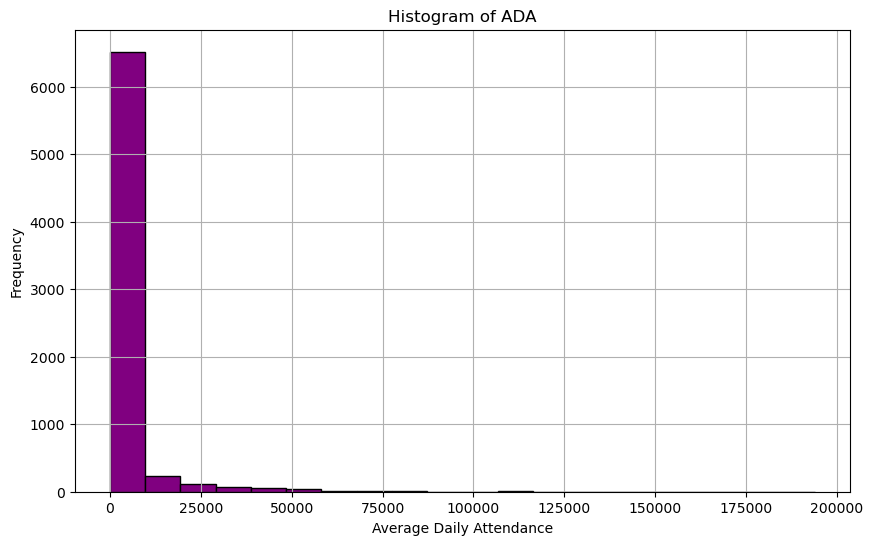

In [197]:
# (6) Outliers: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(ada_df['ADA'], bins=20, color='purple', edgecolor='black')
plt.title('Histogram of ADA')
plt.xlabel('Average Daily Attendance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Just like many of the other features, ADA is heavily skewed to the right, indicating there are huge districts with many more students than the other districts (as we've analyzed with the total enrolled metric). 

In [189]:
# (7) Check for missing values
ada_df.isna().sum()

district_id      0
district_name    0
Year             0
ADA              0
dtype: int64

### 1.6.8 Teacher Expertise <a id='teacher_expertise'></a>

In [199]:
teacher_expertise_df.columns

Index(['DISTRICT', 'DISTNAME', 'DPST00FC', 'DPST00FP', 'DPST01FC', 'DPST01FP',
       'DPST06FC', 'DPST06FP', 'DPST11FC', 'DPST11FP', 'DPST21FC', 'DPST21FP',
       'DPST30FC', 'DPST30FP', 'DPSTBAFC', 'DPSTBAFP', 'DPSTEXPA', 'DPSTKIDR',
       'DPSTMSFC', 'DPSTMSFP', 'DPSTNOFC', 'DPSTNOFP', 'DPSTPHFC', 'DPSTPHFP',
       'DPSTTENA', 'DPSTURNR', 'Year', 'DPST20FC', 'DPST20FP', 'a', 'b', 'c'],
      dtype='object')

We'll need seven key variables in addition to district ID and Year from this dataset, and we'll need to rename all of these for clarity. These will be crucial for gauging teacher expertise as measured by years of experience and degrees attained. 

DPSTEXPA: Teacher Avg Years Experience
DPSTTENA: Teacher Avg Tenure (Years)
DPSTURNR: Teacher Turnover Ratio
DPSTMSFP: Teacher Masters (Ms) Degree Full Time Equivalent Percent
DPSTNOFP: Teacher No Degree Full Time Equivalent Percent
DPSTPHFP: Teacher PhD Degree Full Time Equivalent Percent
DPSTKIDR: Student-Teacher Ratio

In [200]:
# Teacher Expertise Clean-Up

# Specify the columns to keep:
columns_to_keep = ['DISTRICT', 'Year', 'DPSTEXPA', 'DPSTKIDR', 'DPSTMSFP', 
                   'DPSTNOFP', 'DPSTPHFP', 'DPSTTENA', 'DPSTURNR'
                   ]

# Drop all other columns
teacher_expertise_df = teacher_expertise_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'DISTRICT': 'district_id',  
    'DPSTEXPA': 'teacher_avg_yrs_experience',
    'DPSTKIDR': 'student_teacher_ratio', 
    'DPSTMSFP': 'teacher_ms_degree_percent', 
    'DPSTNOFP': 'teacher_no_degree_percent', 
    'DPSTPHFP': 'teacher_phd_degree_percent', 
    'DPSTTENA': 'teacher_avg_tenure_yrs',
    'DPSTURNR': 'teacher_turnover_ratio'
    
}
# Rename the columns using the dictionary
teacher_expertise_df = teacher_expertise_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
teacher_expertise_df['district_id'] = teacher_expertise_df['district_id'].astype(int)  # Convert to integer
# Convert rest of columns to float



# Display the first few rows of the modified dataframe
print(teacher_expertise_df.head())

   district_id  Year teacher_avg_yrs_experience student_teacher_ratio  \
0         1902  2022                       16.7                  12.3   
1         1903  2022                       13.5                    11   
2         1904  2022                       12.8                  10.8   
3         1906  2022                       14.8                  11.3   
4         1907  2022                       12.7                  12.9   

  teacher_ms_degree_percent teacher_no_degree_percent  \
0                      14.8                         0   
1                        19                       1.9   
2                      30.7                       1.3   
3                       9.6                         0   
4                      15.4                       1.2   

  teacher_phd_degree_percent teacher_avg_tenure_yrs teacher_turnover_ratio  
0                          0                    9.9                   19.1  
1                          0                    7.6             

In [204]:
teacher_expertise_df.dtypes

district_id                    int64
Year                           int64
teacher_avg_yrs_experience    object
student_teacher_ratio         object
teacher_ms_degree_percent     object
teacher_no_degree_percent     object
teacher_phd_degree_percent    object
teacher_avg_tenure_yrs        object
teacher_turnover_ratio        object
dtype: object

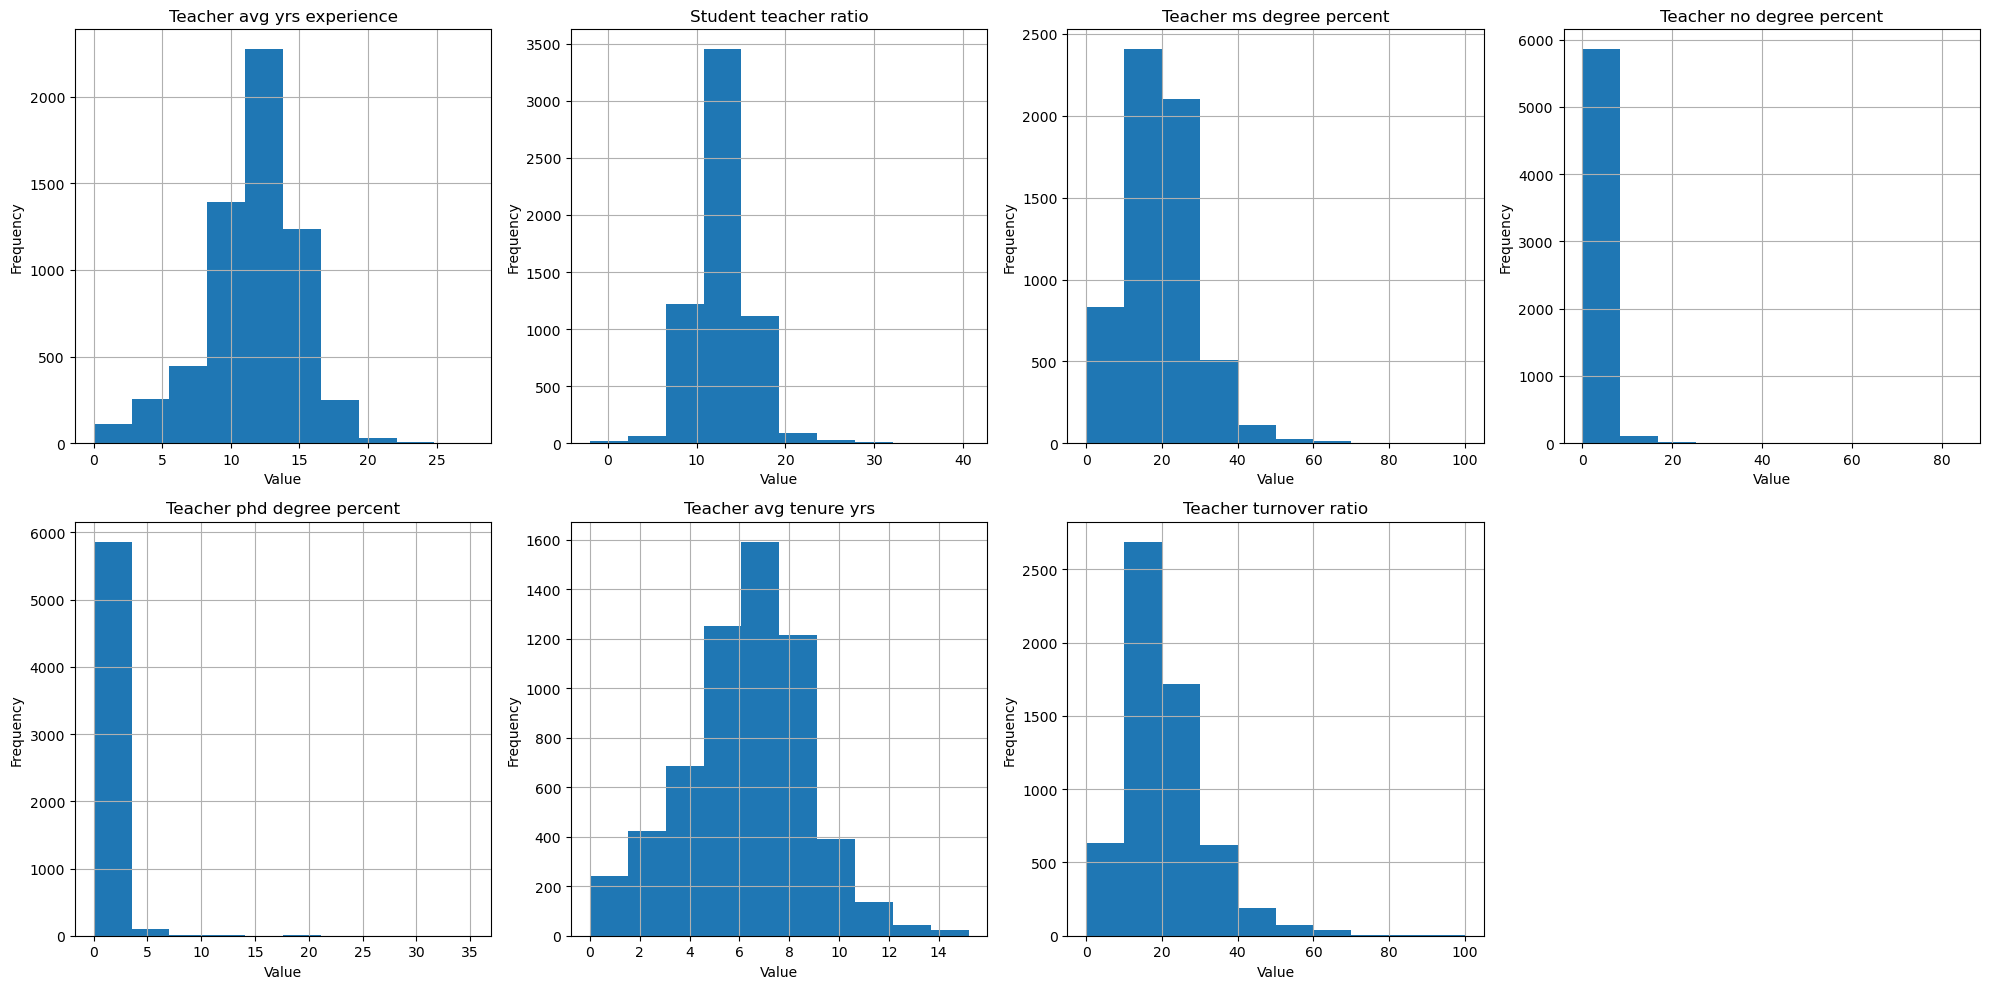

In [205]:
# (4) Outliers: Plotting the histograms

# Convert objects to floats
for column in [
    'teacher_avg_yrs_experience', 
    'student_teacher_ratio', 
    'teacher_ms_degree_percent', 
    'teacher_no_degree_percent', 
    'teacher_phd_degree_percent', 
    'teacher_avg_tenure_yrs', 
    'teacher_turnover_ratio'
]:
    teacher_expertise_df[column] = pd.to_numeric(teacher_expertise_df[column], errors='coerce')

# Select columns
columns_to_plot = [
                'teacher_avg_yrs_experience', 'student_teacher_ratio', 'teacher_ms_degree_percent', 
                'teacher_no_degree_percent', 'teacher_phd_degree_percent', 'teacher_avg_tenure_yrs',
                'teacher_turnover_ratio'
]

# Set up the matplotlib figure size for clarity
plt.figure(figsize=(20, 10))

# Iterate over the list of columns, creating a histogram for each
for index, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 4, index) # Adjust the grid size based on your preferences
    teacher_expertise_df[column].hist()
    plt.title(column.replace('_', ' ').capitalize())
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

We can see a number of normal distributions here. 
- Most teachers have between 8-16 years of experience. 
- Most school districts have student-teacher ratio between 10-20, with a long tail extending towards higher ratios.
- Most districts have around 10-30% of teachers with masters degrees. 
- Almost all districts have only a very small percent of teachers with no degree, which is encouraging since it shows almost all teachers have some form of higher education. 
- Very few districts have teachers with PhDs, as the frequency is near 0%. 
- Avg tenure in years for teachers is most commonly between about 4 and 9 years, indicating most teachers stay in their districts for a moderate amount of time, with fewer staying for longer periods. 
- Teacher turnover ratio is right skewed, showing most districts have a turnover ratio of less than 20%, but a few districts have higher turnover. 

In [206]:
# (5) Check for missing values
teacher_expertise_df.isna().sum()

district_id                    0
Year                           0
teacher_avg_yrs_experience     8
student_teacher_ratio          8
teacher_ms_degree_percent      8
teacher_no_degree_percent      8
teacher_phd_degree_percent     8
teacher_avg_tenure_yrs         8
teacher_turnover_ratio        39
dtype: int64

### 1.6.9 Kids in Poverty <a id='kids_in_poverty'></a>

We'll need all but two columns in this dataset. Potential for feature engineering later. 

In [207]:
# Kids in Poverty Clean-Up

# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name', 'Year', 
                   'Estimated Total Population', 'Estimated Population 5-17', 
'Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder']

# Drop all other columns
poverty_df = poverty_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    'Estimated Total Population': 'estimated_total_population',
    'Estimated Population 5-17': 'estimated_population_5_17',
    'Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder': 
    'estimated_children_in_poverty_5_17'
}
# Rename the columns using the dictionary
poverty_df = poverty_df.rename(columns=rename_dict)

poverty_df.dropna(subset=['district_id'], inplace=True)

# (3) Data Type Conversion
# Convert columns to appropriate data types
poverty_df['district_id'] = poverty_df['district_id'].astype(int)  # Convert to integer



# Display the first few rows of the modified dataframe
print(poverty_df.head())

   district_id  district_name  Year  estimated_total_population  \
0       109901     Abbott ISD  2022                        1082   
1        95901  Abernathy ISD  2022                        3476   
2       221901    Abilene ISD  2022                      105506   
3        14901    Academy ISD  2022                        9120   
4       180903     Adrian ISD  2022                         251   

   estimated_population_5_17  estimated_children_in_poverty_5_17  
0                        185                                  18  
1                        774                                 147  
2                      17290                                3505  
3                       2076                                 216  
4                         31                                   9  


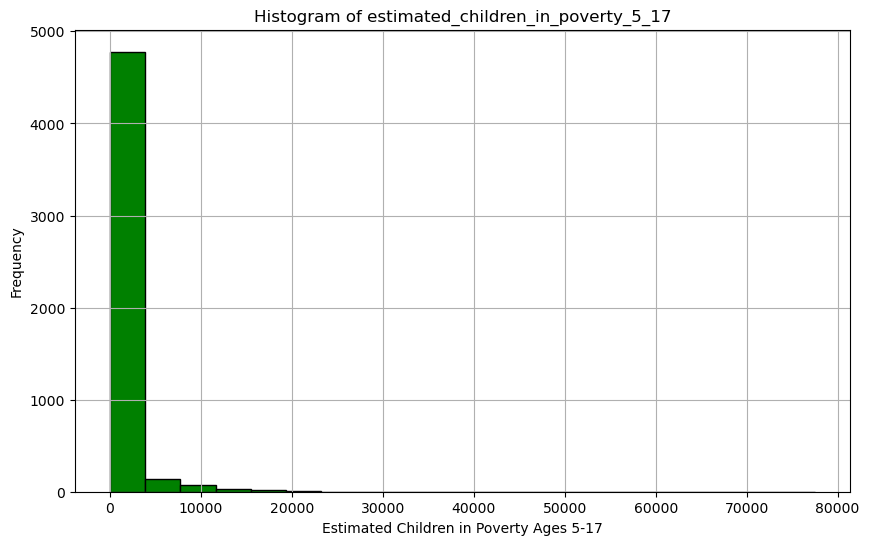

In [208]:
# (4) Outliers: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(poverty_df['estimated_children_in_poverty_5_17'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of estimated_children_in_poverty_5_17')
plt.xlabel('Estimated Children in Poverty Ages 5-17')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram is heavily right skewed, indicating there are a small minority of districts with disproportionate amounts of children experiencing poverty. We'll want to explore the effects of this on student performance later. 

In [209]:
# (5) Check for missing values
poverty_df.isna().sum()

district_id                           0
district_name                         0
Year                                  0
estimated_total_population            0
estimated_population_5_17             0
estimated_children_in_poverty_5_17    0
dtype: int64

### 1.6.10 Median Incomes <a id='median_incomes'></a>

All we need are median Incomes by District, but the Score column could be interesting as it ranks the most equitable to least equitable school districts, so we'll include this as well. 

The dataset has a column for 'Expenditures for Public Elementary and Secondary Schools per Pupil', but we'll exclude this since we don't know how exactly it has been calculated, and we'll feature engineer this with our other data later. 

In [210]:
# Median Incomes Clean-Up

income_df = income_data_df

# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name', 'Year', 
                  'Score', 'Income by School District']

# Drop all other columns
income_df = income_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    'Score': 'inequality_score', 
    'Income by School District': 'income_by_district'
}
# Rename the columns using the dictionary
income_df = income_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
income_df['district_id'] = income_df['district_id'].astype(int)  # Convert to integer



# Display the first few rows of the modified dataframe
print(income_df.head())



   district_id   district_name  Year  inequality_score  income_by_district
0       207901  Schleicher ISD  2023              0.06               61094
1       143906      Ezzell ISD  2023              0.07               62833
2        91901       Bells ISD  2023              0.08               73388
3        70901      Avalon ISD  2023              0.10               67250
4       184908     Peaster ISD  2023              0.17               72349


We likely won't use their inequality score since the methodology for calculating is unclear, but we'll keep this feature for now to use as a potential new feature to be engineered later. 

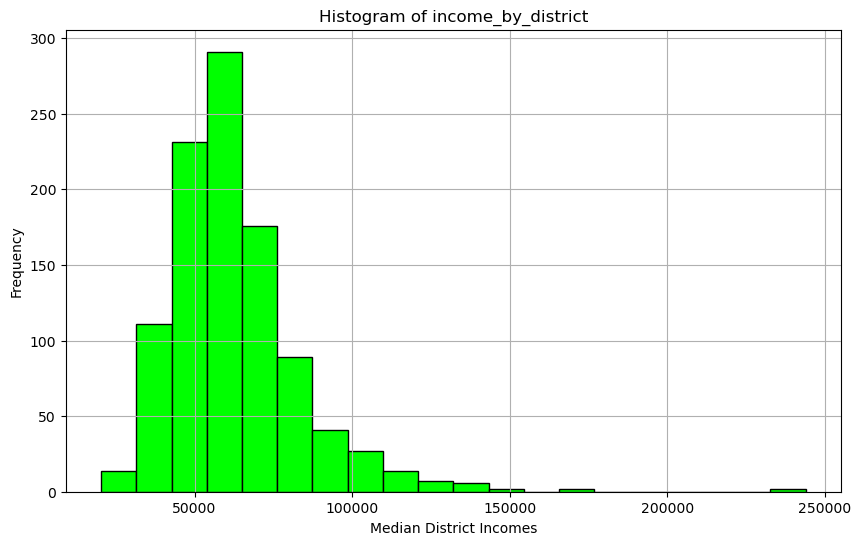

In [211]:
# (4) Outliers: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(income_df['income_by_district'], bins=20, color='lime', edgecolor='black')
plt.title('Histogram of income_by_district')
plt.xlabel('Median District Incomes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This shows a more normal distribution than most of the other features, with some outliers on the right. We'll explore whether kids in poverty or income 

In [212]:
# (5) Check for missing values
income_df.isna().sum()

district_id           0
district_name         0
Year                  0
inequality_score      0
income_by_district    0
dtype: int64

We'll count the distinct district_id values for each dataset to gauge how many observations we'll end up with after joining the datasets. 

In [214]:
# Function to count distinct 'district_id' values in each dataframe
def count_distinct_ids(dataframes_info):
    counts = {}
    for df, name in dataframes_info:
        # Count distinct 'district_id' values
        unique_count = df['district_id'].nunique()
        counts[name] = unique_count
    return counts

# List of tuples (dataframe, name)
dataframes_info = [
    (grad_df, 'grad_df'),
    (sat_act_df, 'sat_act_df'),
    (funding_df, 'funding_df'),
    (property_values_df, 'property_values_df'),
    (ap_ib_scores_df, 'ap_ib_scores_df'),
    (teacher_df, 'teacher_df'),
    (ada_df, 'ada_df'),
    (teacher_expertise_df, 'teacher_expertise_df'), 
    (poverty_df, 'poverty_df'),
    (income_df, 'income_df')
]

# Call the function and print the results
distinct_id_counts = count_distinct_ids(dataframes_info)
for name, count in distinct_id_counts.items():
    print(f"Distinct 'district_id' count in {name}: {count}")

Distinct 'district_id' count in grad_df: 1080
Distinct 'district_id' count in sat_act_df: 1112
Distinct 'district_id' count in funding_df: 1216
Distinct 'district_id' count in property_values_df: 1018
Distinct 'district_id' count in ap_ib_scores_df: 51
Distinct 'district_id' count in teacher_df: 1215
Distinct 'district_id' count in ada_df: 1416
Distinct 'district_id' count in teacher_expertise_df: 1218
Distinct 'district_id' count in poverty_df: 1018
Distinct 'district_id' count in income_df: 1013


The ap_ib_scores_df dataset appears to have an extremely low number of districts, let's see which districts are present. 

In [215]:
ap_ib_scores_df['district_name']

0                     Temple ISD
57               San Antonio ISD
114                   Judson ISD
171                    Bryan ISD
228              South Texas ISD
                  ...           
2106    Hurst-Euless-Bedford ISD
2160                  Austin ISD
2214           Wichita Falls ISD
2268              Round Rock ISD
2322                 Leander ISD
Name: district_name, Length: 213, dtype: object

Though it would be beneficial to see how participation in advanced courses and testing correlates to student success, the number of observations are far too low for our analysis, so we'll exclude this dataset in our join. 

## 1.7 Ensure Consistency of district_id Column Values <a id='ensure_consistency'></a>

We've also verified that each dataset contains the necessary key column for joining (district_id), and we've converted these to integers, but let's ensure consistency among the column values across datasets. 

In [217]:
def find_id_consistency(*dataframes):
    # Create a set with all unique district_ids from the first dataframe
    common_ids = set(dataframes[0]['district_id'].unique())
    
    # Intersect this set with sets of unique district_ids from all other dataframes
    for df in dataframes[1:]:
        common_ids &= set(df['district_id'].unique())
    
    # Now common_ids contains only the district_ids that are present in every dataframe
    # The inconsistent ids are those that are not in the intersection
    total_consistent = len(common_ids)
    total_inconsistent = sum(len(set(df['district_id'].unique())) for df in dataframes) - total_consistent * 9
    
    return total_consistent, total_inconsistent

# List of your dataframes
dataframes = [grad_df, sat_act_df, funding_df, property_values_df, 
              teacher_df, ada_df, teacher_expertise_df, poverty_df, income_df]

# Calculate the consistent and inconsistent district_id values
total_consistent, total_inconsistent = find_id_consistency(*dataframes)

print(f"Total consistent district_id values: {total_consistent}")
print(f"Total inconsistent district_id values: {total_inconsistent}")

Total consistent district_id values: 964
Total inconsistent district_id values: 1630


We have 964 unique districts consistent across all datasets, which isn't too far removed from the roughly 1,200 total districts. However, we'll want to see how this performs in the modeling stage, as the data quantity may be insufficient for predictive purposes. 

## 1.8 Join All Datasets <a id='join_all_datasets'></a>

Now we'll merge all eight datasets together on district_id column and Year (again we're excluding ap_ib_scores_df due to too few observations). 

In [220]:
from functools import reduce
import pandas as pd



def merge_dataframes_on_columns(dataframes, merge_on_columns, how='outer'):
    # Make sure the merge_on_columns is a list
    if not isinstance(merge_on_columns, list):
        merge_on_columns = [merge_on_columns]

    # Convert the merge columns to the same data type (string is generally the most flexible)
    for df in dataframes:
        for column in merge_on_columns:
            df[column] = df[column].astype(str)

    # Initialize the merged DataFrame with the first DataFrame in the list
    merged_df = dataframes[0]

    # Use reduce to merge all DataFrames on the specified columns
    for df in dataframes[1:]:
        merged_df = pd.merge(merged_df, df, on=merge_on_columns, how=how, suffixes=('', '_right'))

    return merged_df

# List of your DataFrames
dfs = [grad_df, sat_act_df, funding_df, property_values_df, teacher_df, ada_df, teacher_expertise_df,
       poverty_df, income_df]

# ['district_id', 'Year'] are the columns you want to merge on
merged_df = merge_dataframes_on_columns(dfs, ['district_id', 'Year'])

print(merged_df.head())

  calc_for_state_acct district_id           district_name  county  \
0                 Yes       22902            Marathon ISD    22.0   
1                 Yes       46802  Trinity Charter School    46.0   
2                 Yes       65902              Hedley ISD    65.0   
3                 Yes      115903           Dell City ISD   115.0   
4                 Yes      122902           Valentine ISD   122.0   

         county_name  region  region_name  dist_allr_grad  dist_allr_cont  \
0    Brewster County    18.0      Midland            -1.0            -1.0   
1       Comal County    20.0  San Antonio            -1.0            -1.0   
2      Donley County    16.0     Amarillo            -1.0            -1.0   
3    Hudspeth County    19.0      El Paso            -1.0            -1.0   
4  Jeff Davis County    18.0      Midland            -1.0            -1.0   

  dist_allr_txchse  ...  teacher_phd_degree_percent teacher_avg_tenure_yrs  \
0               -1  ...                     

In [221]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8137 entries, 0 to 8136
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   calc_for_state_acct                 5374 non-null   object 
 1   district_id                         8137 non-null   object 
 2   district_name                       5374 non-null   object 
 3   county                              5374 non-null   float64
 4   county_name                         5374 non-null   object 
 5   region                              5374 non-null   float64
 6   region_name                         5374 non-null   object 
 7   dist_allr_grad                      5374 non-null   float64
 8   dist_allr_cont                      5374 non-null   float64
 9   dist_allr_txchse                    3237 non-null   object 
 10  dist_allr_drop                      5374 non-null   float64
 11  Year                                8137 no

## 1.9 Save Data <a id='save_data'></a>

In [222]:
# Save the data 
output_file_path = '/Users/joshuabe/Desktop/DataScienceGuidedCapstone/Notebooks/student_success_all_data_merged.csv'
merged_df.to_csv(output_file_path, index=False)